In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom, uniform

In [2]:
joonised_kaust = 'tees/joonised/'

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$
$\newcommand{\accuracy}{Acc}$
$\newcommand{\precision}{Prec}$
$\newcommand{\recall}{Rec}$

## Õigsuste vahe lähendamine
Siiani oleme lähendeid kvaliteedimõõtude vahele avaldatud vahetult läbi vahe oodatud väärtuse definitsiooni. Tehes teisendusi vahe definitsioonis antud avaldises võime selle eraldada mitmeks komponendiks. Lõpliku lähendi leidmiseks peame lähendama iga komponenti eraldi ning nende põhjal arvutama vahele hinnangu.

Olgu meil kaks klassifitseerimismeetodit koos juhusliku andmepunkti $Y$ klassifitseerimisele vastavate juhuslike suurustega $A$ ja $B$. Siis saame valemi \eqref{eq:õigsus vahe} kirjutada lahti vastavalt definitsioonile
\begin{equation}
    \label{eq:õigus vahe definitsiooni järgi keskväärtuste kaudu}
    \Delta \accuracy = \mean{A = Y} - \mean{B = Y} = \mean{[A = Y] - [B = Y]} \enspace.
\end{equation}
Tähistagu $Z$ valemis \eqref{eq:õigus vahe definitsiooni järgi keskväärtuste kaudu} viimase keskväärtusmärgi all olevat juhuslikkus suurust, $Z = [A = Y] - [B = Y]$. Analoogselt võime valemis \eqref{eq:õigsus vahe lähend} oleva summa liikmeid tõlgendada juhuslike suurustena $Z_i = [a_i = y_i] - [b_i = y_i]$. Kui arvestame, et juhuslikud suurused $Z_i$ on sõltumatud ning sama jaotusega kui $Z$, näeme et lähendi \eqref{eq:õigsus vahe lähend} keskväärtus on
\begin{equation}
    \mean{\Delta \widehat{\accuracy}} = \frac{1}{N} \cdot \sum_{i = 1}^N \cdot \mean{Z_i} = \Delta \accuracy \enspace.
\end{equation}
See tähendab, et $\widehat{\accuracy}$ on nihketa hinnang õigsuste vahele. Kuna meetodite erinevus avaldub sündmustes, kus meetodite klassifikatsioonid erinevad ($Z \neq 0$), võime $\Delta \accuracy$ avaldada just selliste sündmuste kaudu
\begin{align*}
    \Delta \accuracy &= \prob{Z = 0} \cdot \mean{Z \mid Z = 0} + \prob{Z \neq 0} \cdot \mean{Z \mid Z \neq 0} \\
    &= \prob{Z \neq 0} \cdot \mean{Z \mid Z \neq 0} \enspace.
\end{align*}
Edasiste arvutuste selgemaks esitamiseks võtame kasutusele tähistused
\begin{align}
    \beta &= \prob{Z \neq 0} \enspace, \label{eq:beta} \\
    \gamma &= \mean{Z | Z \neq 0} \enspace, \label{eq:gamma} \\
    \kappa &= \prob{Z = 1 | Z \neq 0} \enspace. \label{eq:kappa}
\end{align}
Need kolm suurust pole sõltumatud parameetrid. Keskväärtuse definitsioonist lähtuvalt on $\gamma$ ja $\kappa$ omavahel seotud
\begin{equation*}
    \gamma = \mean{Z | Z \neq 0} = 1 \cdot \kappa - 1 \cdot (1 - \kappa) = 2 \kappa - 1 \enspace,
\end{equation*}
ning me saame esitada õigsuste vahe antud suuruste kaudu
\begin{equation}
    \label{eq:õigsus vahe tähistega}
    \Delta \accuracy = \beta \cdot \gamma = \beta \cdot (2 \kappa - 1) \enspace.
\end{equation}

Võrdusest (\ref{eq:õigsus vahe tähistega}) lähtuvalt hindame meetodite õigsuste vahet lähendades suurusi $\beta$ ja $\gamma$. Kuna $\beta = \prob{Z \neq 0}$ on tõenäosus, saame seda hinnata statistilise tõenäosusena üle $N$ elemendilise valimi 
\begin{equation}
    \label{eq:beta lähend}
    \hat{\beta} = \frac{1}{N} \cdot \sum_{i = 1}^{N} [Z_i \neq 0] = \frac{1}{N} \cdot \sum_{i = 1}^{N} [a_i \neq b_i] \enspace,
\end{equation}
\cite{rakendusstatisika-algkursus}.
Summa märgi alune juhuslik suurus võtab väärtusi $0$ ja $1$. See tähendab, et lähendi absoluutse ja relatiivse vea hinnangud saame leida eelmises peatükis kirjeldatud meetodeid kasutades.

Lähendi tinglikule keskväärtusele $\gamma = \mean{Z \mid Z \neq 0}$ on leiame sarnaselt, valimikeskimisena kus iga valimi andmepunkti korral $a_i \neq b_i$. Olgu $K$ sellise valimi suurus, esitame lähendi kujul
\begin{equation}
    \label{eq:gamma lähend}
    \hat{\gamma} = \frac{1}{K} \cdot \sum_{i = 1}^K [a_i = y_i] - [b_i = y_i] \enspace.
\end{equation}
Kuna lähendis $\hat{\gamma}$ on summa liikmete võimalikud väärtused $-1$ ja $1$, ei ole summa liikmed Bernoulli jaotusega. See-eest on ikka tegu binaarse tunnusega, mille põhjal defineerime uue Bernoulli jaotusega juhusliku suuruse $W$, mis võtab väärtuse $0$ kui summeritav suurus võtab $-1$ ning muidu $1$
\begin{equation*}
    W = \frac{Z + 1}{2} \enspace,
\end{equation*}
mille puhul
\begin{align*}
    \prob{W = 1} &= \prob{Z = 1 | Z \neq 0} = \kappa \enspace, \\
    \prob{W = 0} &= \prob{Z = -1 | Z \neq 0} = 1 - \kappa \enspace.
\end{align*}
Sündmusena on uus defineeritud suurus samaväärne vanaga, endiselt võime rakendada binoomjaotusel põhinevaid tulemusi eelmisest peatükist. Lähtume võrrandist
\begin{equation*}
    \prob{\left| \frac{\hat{\gamma}}{\gamma} - 1 \right| \geq \varepsilon} = \alpha \enspace,
\end{equation*}
ning kordama sama mõttekäiku, mis valemi \eqref{eq:binoomjaotus relatiivne viga} puhul.

Leitud lähendite korrutisest leiame omakorda lähendi meetodite õigsuste vahele
\begin{equation*}
    \Delta \widehat{\accuracy} = \hat{\beta} \cdot \hat{\gamma} \enspace.
\end{equation*}
Vahe lähendi relatiivse vea dispersioon avaldame relatiivse vea korrutise omaduse \eqref{eq:korrutise relatiivne viga dispersioon ligikaudne} põhjal
\begin{equation}
    \variance{\frac{\hat{\beta} \cdot \hat{\gamma}}{\beta \cdot \gamma}} \approx \variance{\frac{\hat{\beta}}{\beta}} + \variance{\frac{\hat{\gamma}}{\gamma}} \enspace,
\end{equation}
kus hinnangute $\hat{\beta}$ ja $\hat{\gamma}$ relatiivsete vigade dispersioonid on
\begin{align}
    \variance{\frac{\hat{\beta}}{\beta}} &= \frac{1}{N} \cdot \frac{1 - \beta}{\beta} \enspace, \label{eq:beta relatiivne viga dispersioon} \\
    \variance{\frac{\hat{\gamma}}{\gamma}} &= \frac{1}{K} \cdot (\mean{Z^2 | Z \neq 0} - \mean{Z | Z\neq 0}^2) = \frac{1}{K} \cdot (1 - \gamma^2) \enspace. \label{eq:gamma relatiivne viga dispersioon}
\end{align}

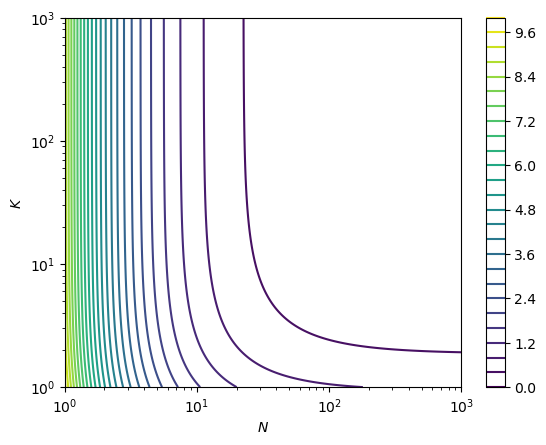

In [3]:
N, K = np.meshgrid(np.logspace(0, 3, num=1000), np.logspace(0, 3, num=1000))

dacc = 0.05
beta = 0.1

var1 = 1 / N * ((1 - beta) / beta)
var2 = 1 / K * (1 - (dacc / beta) ** 2)
var = var1 + var2

plt.xlabel('$N$')
plt.xticks(np.logspace(0, 5, num=6))
plt.xscale('log')

plt.ylabel('$K$')
plt.yticks(np.logspace(0, 5, num=6))
plt.yscale('log')

plt.contour(N, K, var, 30)
plt.colorbar()

plt.savefig(joonised_kaust + 'oigsus_vahe_relatiive_viga_dispersioon.png', dpi=100)
plt.show()

Joonise ning vahetulemuste \eqref{eq:beta relatiivne viga dispersioon} ja \eqref{eq:gamma relatiivne viga dispersioon} kaudu näeme, et $\Delta \widehat{\accuracy}$ relatiivse vea dispersioon kahaneb valimisuuruste kasvades. Telgedel olevatest suurustest tähistab $N$ valimi suurust, mida ei pea märgendama. Kuna sellise valimi leidmine ei ole keeruline võime eeldada, et $N$ on fikseeritud ja küllaltki suur. Oluline on aga suurus $K$, mis tähistab märgendamist vajavate andmepunktide arvu. Märgendatud valimi suuruse prognoosimiseks fikseeritud $N$ põhjal uurime olukorda, kus saavutame võrdsed lähendite $\hat{\beta}$ ja $\hat{\gamma}$ dispersioonid
\begin{equation}
    \label{eq:võrdsed vahe relatiivse vea dispersioonid}
    \frac{1}{N} \cdot \frac{1 - \beta}{\beta} = \frac{1}{K} \cdot (1 - \gamma^2) \enspace.
\end{equation}
Kuna $\Delta \accuracy = \beta \cdot \gamma$, saame valemi \eqref{eq:võrdsed vahe relatiivse vea dispersioonid} esitata kujul
\begin{equation}    
    K = N \cdot \frac{\beta}{1-\beta} \cdot \left( 1 - \frac{(\Delta\accuracy)^2}{\beta^2} \right) \enspace,
\end{equation}
mille põhjal saame hinnata märgendamist vajava valimi suurust.